In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
housing=pd.read_csv("./housing.csv")

In [116]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#converting categorical variable into numerical variable

In [7]:
cat_vars=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
def binary_map(x):
    return x.map({"yes":1,"no":0})
housing[cat_vars]=housing[cat_vars].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
#using dummy variables on furninshingstatus

In [8]:
furnishing=pd.get_dummies(housing['furnishingstatus'])
furnishing.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [9]:
#concatinating
housing=pd.concat([housing,furnishing],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [10]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [11]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [12]:
#rescaling features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
vars=['price','area','bedrooms','bathrooms','stories','parking']
housing[vars]=scaler.fit_transform(housing[vars])

In [13]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1,0,0


In [124]:
housing.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


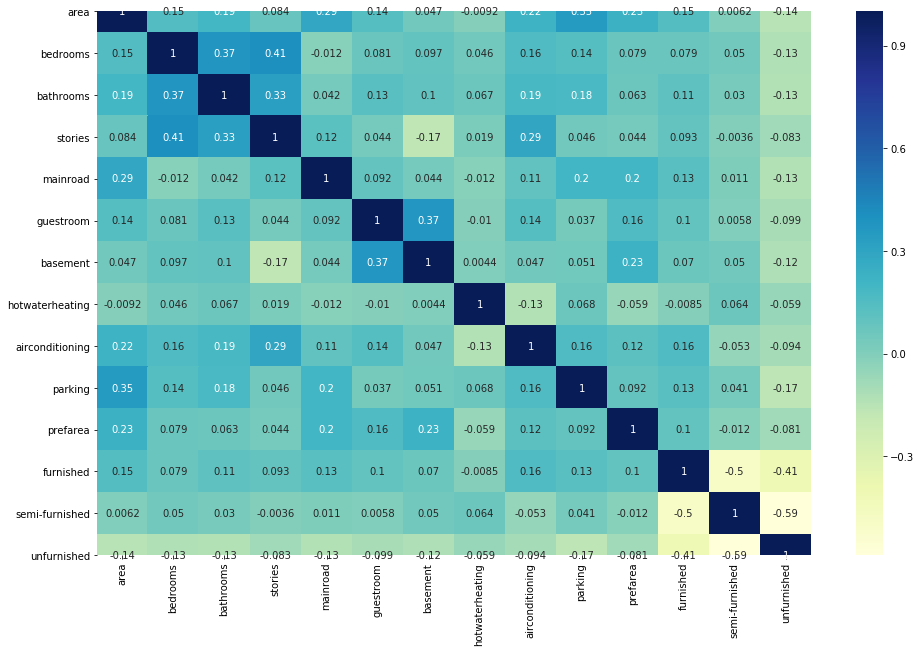

In [110]:
fig=plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(),annot=True,cmap="YlGnBu")

In [14]:
#split into train & test set
from sklearn.model_selection import train_test_split

In [15]:
x=housing.iloc[:,:-1]#independent features
y=housing.iloc[:,-1]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [17]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(381, 14) (164, 14) (381,) (164,)


## LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin=LinearRegression()
mse=cross_val_score(lin,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
mean_mse=np.mean(mse)
print(mean_mse)

-5.244717540756222e-16


## RIDGE REGRESSION

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [19]:
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                 1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}
ridge=Ridge()
grid1=GridSearchCV(ridge,params,cv=10,scoring='neg_mean_absolute_error',return_train_score=True,verbose=1)


In [20]:
grid1.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    4.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [21]:
print(grid1.best_params_)
print(grid1.best_score_)

{'alpha': 0.0001}
-1.225395800545156e-06


In [26]:
grid1.

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [198]:
cv_results=pd.DataFrame(grid1.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.015088,0.004397,0.006296,0.002683,0.0001,{'alpha': 0.0001},-0.000001,-0.000001,-0.000001,-0.000001,...,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,2.119950e-09
1,0.012745,0.005284,0.002162,0.004830,0.001,{'alpha': 0.001},-0.000013,-0.000013,-0.000012,-0.000012,...,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,2.119482e-08
2,0.013982,0.004927,0.005703,0.005546,0.01,{'alpha': 0.01},-0.000128,-0.000126,-0.000118,-0.000120,...,-0.000117,-0.000117,-0.000117,-0.000117,-0.000117,-0.000117,-0.000117,-0.000117,-0.000117,2.114806e-07
3,0.012409,0.004430,0.001199,0.001886,0.05,{'alpha': 0.05},-0.000640,-0.000627,-0.000590,-0.000598,...,-0.000583,-0.000583,-0.000583,-0.000582,-0.000583,-0.000585,-0.000583,-0.000584,-0.000583,1.047088e-06
4,0.013535,0.004651,0.002762,0.004917,0.1,{'alpha': 0.1},-0.001279,-0.001252,-0.001179,-0.001195,...,-0.001164,-0.001163,-0.001164,-0.001163,-0.001165,-0.001167,-0.001164,-0.001165,-0.001165,2.068740e-06
5,0.012156,0.007017,0.004297,0.002933,0.2,{'alpha': 0.2},-0.002549,-0.002495,-0.002350,-0.002383,...,-0.002321,-0.002320,-0.002321,-0.002319,-0.002322,-0.002328,-0.002320,-0.002324,-0.002323,4.037995e-06
6,0.008328,0.008454,0.003525,0.006164,0.3,{'alpha': 0.3},-0.003811,-0.003729,-0.003514,-0.003565,...,-0.003471,-0.003470,-0.003471,-0.003469,-0.003474,-0.003481,-0.003471,-0.003475,-0.003474,5.911967e-06
7,0.014564,0.005454,0.003298,0.002192,0.4,{'alpha': 0.4},-0.005066,-0.004956,-0.004671,-0.004740,...,-0.004614,-0.004614,-0.004615,-0.004612,-0.004618,-0.004628,-0.004614,-0.004620,-0.004619,7.695526e-06
8,0.009338,0.006495,0.005794,0.005351,0.5,{'alpha': 0.5},-0.006312,-0.006174,-0.005820,-0.005909,...,-0.005751,-0.005750,-0.005753,-0.005748,-0.005756,-0.005768,-0.005751,-0.005758,-0.005757,9.393353e-06
9,0.004687,0.007159,0.003125,0.006250,0.6,{'alpha': 0.6},-0.007551,-0.007384,-0.006962,-0.007071,...,-0.006882,-0.006881,-0.006884,-0.006878,-0.006887,-0.006902,-0.006882,-0.006889,-0.006888,1.101012e-05


In [183]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

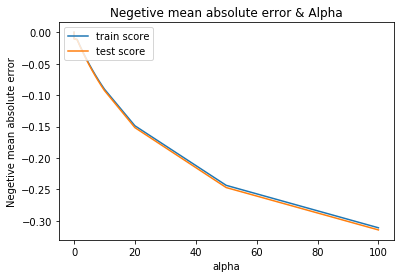

In [199]:
#plotting mean test & train scores with alpha
cv_results['param_alpha']=cv_results['param_alpha'].astype('int32')
#plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negetive mean absolute error')
plt.title("Negetive mean absolute error & Alpha")
plt.legend(['train score','test score'],loc='upper left')

In [29]:
alpha=0.0001
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
ridge.coef_

array([-2.09311224e-06,  1.45827926e-07, -4.28943984e-07,  2.07722573e-07,
        1.31598251e-07, -2.24924791e-07,  2.32776505e-07, -9.37763107e-08,
       -1.23029433e-07, -1.01886268e-07, -1.38244816e-07,  3.77217057e-08,
       -9.99997082e-01, -9.99997556e-01])

# LASSO REGRESSION

In [30]:
from sklearn.linear_model import Lasso
lasso=Lasso()
params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                 1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}
grid2=GridSearchCV(ridge,params,cv=10,scoring='neg_mean_absolute_error',return_train_score=True,verbose=1)
grid2.fit(X_train,y_train)


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    4.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=0.0001, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5,
                                   6, 7, 8, 9, 10, 20, 50, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [31]:
print(grid2.best_params_)
print(grid2.best_score_)

{'alpha': 0.0001}
-1.225395800545156e-06


In [32]:
cv_results=pd.DataFrame(grid2.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.011395,0.008666,0.007123,0.004824,0.0001,{'alpha': 0.0001},-0.000001,-0.000001,-0.000001,-0.000001,...,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,-0.000001,4.512022e-09
1,0.010559,0.005591,0.003197,0.002819,0.001,{'alpha': 0.001},-0.000013,-0.000012,-0.000012,-0.000013,...,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,-0.000012,4.510120e-08
2,0.014062,0.004687,0.001562,0.004687,0.01,{'alpha': 0.01},-0.000129,-0.000122,-0.000120,-0.000127,...,-0.000118,-0.000118,-0.000118,-0.000118,-0.000118,-0.000119,-0.000118,-0.000118,-0.000118,4.491194e-07
3,0.006255,0.007661,0.009365,0.007647,0.05,{'alpha': 0.05},-0.000644,-0.000610,-0.000600,-0.000631,...,-0.000590,-0.000590,-0.000589,-0.000587,-0.000591,-0.000592,-0.000589,-0.000587,-0.000590,2.204531e-06
4,0.000000,0.000000,0.009375,0.007655,0.1,{'alpha': 0.1},-0.001285,-0.001219,-0.001198,-0.001260,...,-0.001177,-0.001178,-0.001175,-0.001172,-0.001180,-0.001181,-0.001176,-0.001173,-0.001177,4.315763e-06
5,0.003124,0.006248,0.003122,0.006244,0.2,{'alpha': 0.2},-0.002560,-0.002433,-0.002386,-0.002508,...,-0.002346,-0.002347,-0.002342,-0.002337,-0.002351,-0.002354,-0.002343,-0.002337,-0.002346,8.302113e-06
6,0.012436,0.005244,0.002163,0.004641,0.3,{'alpha': 0.3},-0.003827,-0.003640,-0.003566,-0.003744,...,-0.003506,-0.003507,-0.003501,-0.003493,-0.003513,-0.003519,-0.003502,-0.003493,-0.003506,1.203417e-05
7,0.005034,0.006037,0.003625,0.006082,0.4,{'alpha': 0.4},-0.005084,-0.004842,-0.004736,-0.004970,...,-0.004658,-0.004660,-0.004652,-0.004641,-0.004667,-0.004675,-0.004653,-0.004641,-0.004658,1.546689e-05
8,0.007828,0.007391,0.001699,0.002146,0.5,{'alpha': 0.5},-0.006333,-0.006037,-0.005898,-0.006185,...,-0.005802,-0.005804,-0.005795,-0.005782,-0.005813,-0.005824,-0.005795,-0.005781,-0.005803,1.873024e-05
9,0.011656,0.002073,0.004096,0.001759,0.6,{'alpha': 0.6},-0.007573,-0.007226,-0.007052,-0.007391,...,-0.006939,-0.006942,-0.006931,-0.006916,-0.006952,-0.006964,-0.006931,-0.006915,-0.006940,2.174625e-05


In [33]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'split7_train_score', 'split8_train_score', 'split9_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

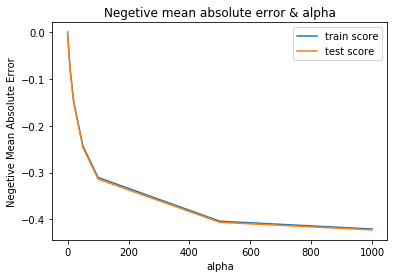

In [34]:
cv_results['param_alpha']=cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negetive Mean Absolute Error')
plt.title("Negetive mean absolute error & alpha")
plt.legend(['train score','test score'],loc='upper right')
plt.show()

In [35]:
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.99897554, -0.9991332 ])

In [36]:
prediction_lasso=lasso.predict(X_test)
prediction_ridge=ridge.predict(X_test)

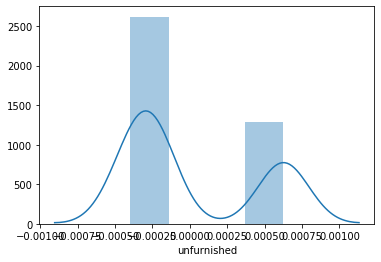

In [38]:
sns.distplot(y_test-prediction_lasso)

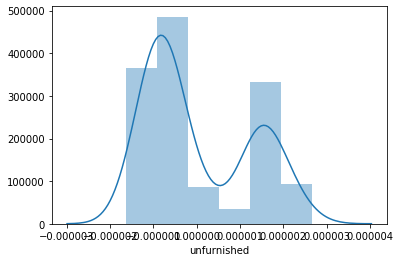

In [39]:
sns.distplot(y_test-prediction_ridge)